# SUPERVISED LEARNING

* It's basically like when a child is pointing at different things and asks "What is that?" and the parent gives an answer - or in other words the parent provides a label.
* In supervised learning we provide the computer with datapoints - the things which we want it to learn to give name to (or in other words label them). So we are the computers supervisor.

## K-NN IN PYTHON, NUMPY, & SOME PANDAS
*(+ sklearn.dataset module + matplotlib for visualisation)*


Overview of the pipeline:
1. import the dataset
2. visualize & inspect the data
3. split the dataset into training and test datasets
4. implement the model
5. fit the model
6. evaluate the model

## IMPLEMENTATION

### 1) IMPORT THE DATASET

In [79]:
from sklearn.datasets import load_iris
iris_ds = load_iris()

type(iris_ds)

sklearn.utils.Bunch

### 2) INSPECT THE DATA

#### a) Print the names of the main contents of the dataset object

In [80]:
iris_ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#### b) Print all the content of iris_dataset

In [81]:
for column in iris_ds:
    print(str(column)+ '\n' + str(iris_ds[column]) + '\n')

data
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3

In [82]:
print(type(iris_ds['data']))
print(type(iris_ds['target']))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### 3) PREPARING THE DATA FOR THE CLASSIFIER

#### a) import numpy; create data & labels lists

In [83]:
data = iris_ds.data
labels = iris_ds.target

#### b) split the dataset into train data & test data & shuffle them

In [84]:
import numpy as np

In [85]:
np.random.seed(42)
indices = np.random.permutation(len(data))

n_training_samples = 12
X_train = data[indices[:-n_training_samples]]
y_train = labels[indices[:-n_training_samples]]
X_test = data[indices[-n_training_samples:]]
y_test = labels[indices[-n_training_samples:]]


#### c) let's have a look at the first few rows of the training data

In [86]:
print("The first samples of our learn set:")
print(f"{'index':7s}{'data':20s}{'label':3s}")
for i in range(5):
    print(f"{i:4d}    {X_train[i]}    {y_train[i]:3}")


The first samples of our learn set:
index  data                label
   0    [6.1 2.8 4.7 1.2]      1
   1    [5.7 3.8 1.7 0.3]      0
   2    [7.7 2.6 6.9 2.3]      2
   3    [6.  2.9 4.5 1.5]      1
   4    [6.8 2.8 4.8 1.4]      1


In [87]:
print("The first samples of our test set:")
print(f"{'index':7s}{'data':20s}{'label':3s}")
for i in range(5):
    print(f"{i:4d}    {X_test[i]}    {y_test[i]:3}")

The first samples of our test set:
index  data                label
   0    [5.7 2.8 4.1 1.3]      1
   1    [6.5 3.  5.5 1.8]      2
   2    [6.3 2.3 4.4 1.3]      1
   3    [6.4 2.9 4.3 1.3]      1
   4    [5.6 2.8 4.9 2. ]      2


#### d) let's visualize the train data!

In [88]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

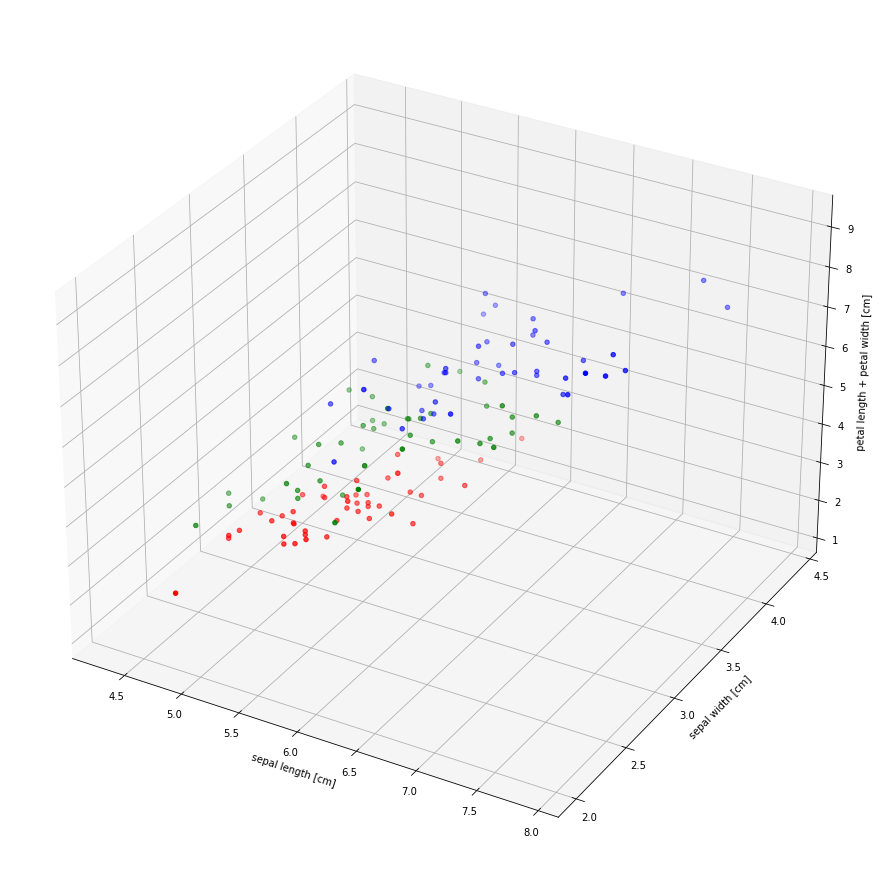

In [89]:
colours = ('r', 'b')
X = []

for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(X_train)):
        if y_train[i] == iclass:
            X[iclass][0].append(X_train[i][0])
            X[iclass][1].append(X_train[i][1])
            X[iclass][2].append(sum(X_train[i][2:]))
            
colours = ('r', 'g', 'b')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for iclass in range(3):
    ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], 
              c=colours[iclass])

fig.set_size_inches(15.5, 19.5)
plt.xlabel("sepal length [cm]")
plt.ylabel("sepal width [cm]")
angle = 45
ax.set_zlabel('petal length + petal width [cm]', rotation=angle)
plt.show()


### 4) IMPLEMENT KNN

#### a) we want several functions:

* eucl_dist(new_observation, prior_observation) that returns the euclidean distance between new_observation and prior_observation

* then a function knn(new_observation, training data, k). This one returns the k nearest neighbors for new_observation from the data.

#### b) create dataframe to store the datapoints, labels & index them

In [90]:
import pandas as pd

In [91]:
train_data_dict_to_df = {'train_datapoints': list(X_train), 'labels': list(y_train)}
train_data_df = pd.DataFrame(train_data_dict_to_df)

print(train_data_df)
# later I'll add another column with the euclidean distance from the new observation

         train_datapoints  labels
0    [6.1, 2.8, 4.7, 1.2]       1
1    [5.7, 3.8, 1.7, 0.3]       0
2    [7.7, 2.6, 6.9, 2.3]       2
3    [6.0, 2.9, 4.5, 1.5]       1
4    [6.8, 2.8, 4.8, 1.4]       1
..                    ...     ...
133  [6.7, 3.1, 5.6, 2.4]       2
134  [4.9, 3.0, 1.4, 0.2]       0
135  [6.9, 3.1, 4.9, 1.5]       1
136  [7.4, 2.8, 6.1, 1.9]       2
137  [6.3, 2.9, 5.6, 1.8]       2

[138 rows x 2 columns]


#### c) implement knn

In [92]:
import math

In [93]:
def eucl_dist(new_observation, train_datapoint):
    """Calculates the euclidean distance from the new_observation to the train_datapoint.            Both arguments are lists or 1darrays."""
    euclidean_distance = 0
    for i in range(len(new_observation)):
        euclidean_distance += (new_observation[i] - train_datapoint[i])**2
    euclidean_distance = math.sqrt(euclidean_distance)
    
    return euclidean_distance

In [94]:
def knn(new_observation, train_data_df):
    """Returns a df with the euclidean distances between new_observation and train_data_df 
        datapoints. """
    
    eucl_distances = []
    new_df = train_data_df
    
    for i in range(len(new_df)):
        eucl_distances.append(eucl_dist(new_observation,
                  train_data_df['train_datapoints'][i]))
    
    new_df['euclidean_distances'] = eucl_distances
    
    return new_df

#### d) change the value of i in X_test[i] to obtain different results. 

In [95]:
def knn_classifier(test_datapoint_index, k=5):
    """Returns the k nearest neighbors of test_data_point. k=5 by default"""
    
    df = knn(X_test[test_datapoint_index], train_data_df).sort_values(by='euclidean_distances', ascending=True)
    return df[:k]

In [96]:
knn_classifier(0)

,train_datapoints,labels,euclidean_distances
50,"[5.7, 2.9, 4.2, 1.3]",1,0.141421
64,"[5.6, 2.7, 4.2, 1.3]",1,0.173205
125,"[5.6, 3.0, 4.1, 1.3]",1,0.223607
66,"[5.7, 3.0, 4.2, 1.2]",1,0.244949
9,"[5.8, 2.7, 3.9, 1.2]",1,0.264575
